<a href="https://colab.research.google.com/github/m4vic/neuralnets/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flow of this  
data loader obj training and test data --> training loop ---> evaluation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [9]:
#set random seeds for reproducibility
torch.manual_seed(42)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device{device}")

using devicecuda


In [11]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SEE THE DATA

In [12]:
df.shape

(60000, 785)

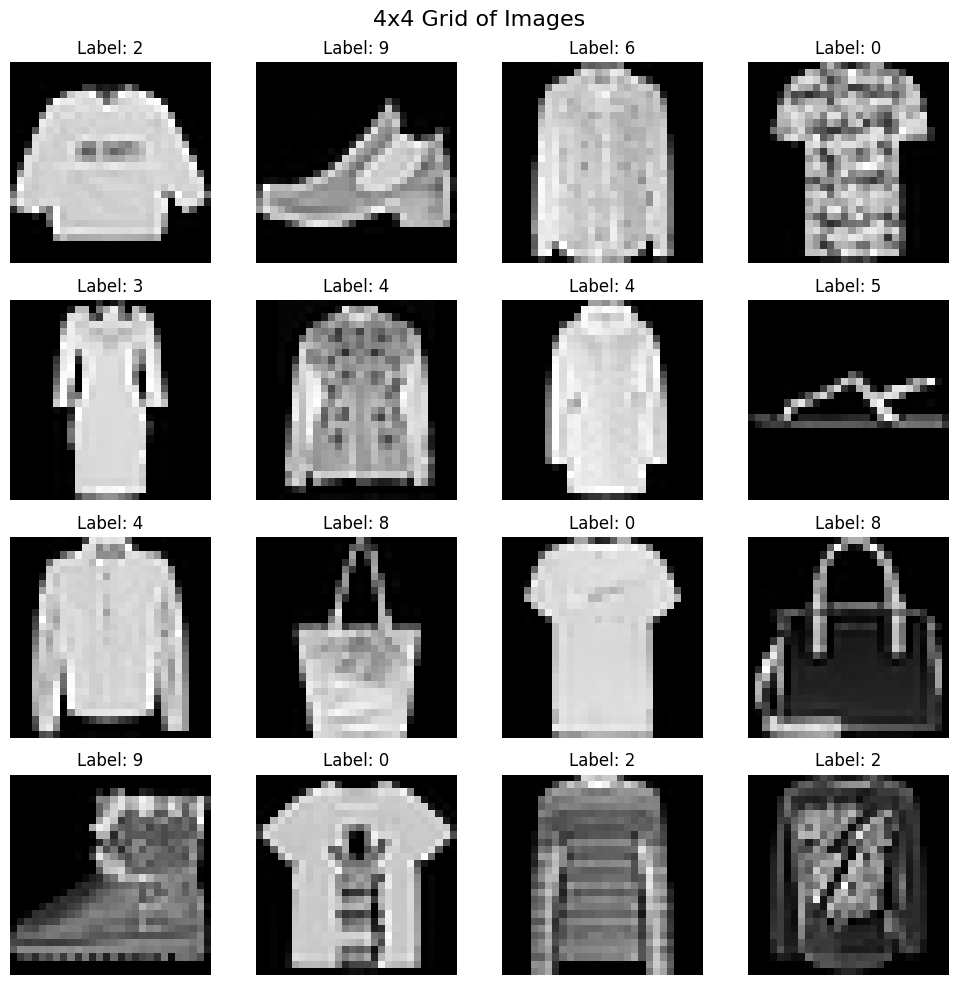

In [13]:
# create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('4x4 Grid of Images', fontsize=16)

for i , ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i, 1:].values.reshape(28, 28), cmap='grey')
  ax.set_title(f'Label: {df.iloc[i, 0]}')
  ax.axis('off')

plt.tight_layout()
plt.show()

DATA

In [14]:
X = df.iloc[:, 1:].values # all from 1 index to end
y = df.iloc[:, 0].values # all 0 th index ie label

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# SCALING THE FEATURES coz noramalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
# create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels): # it will fetch the data from dataset
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long) # declaring the data

  def __len__(self): # it will retrun len
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [18]:
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)

In [19]:
len(train_dataset)

48000

In [20]:
#create test_dataset object
test_dataset = CustomDataset(x_test, y_test)

In [21]:
#create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory =True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [22]:
# define NN

class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128), # input num_features and 128 features as output
        nn.ReLU(),
        nn.Linear(128, 64), # 128 input 64 output
        nn.ReLU(),
        nn.Linear(64, 10) #64 input 10 output
    )

  def forward(self, x):
    return self.model(x)


In [23]:
# set learning rates
epochs = 200
learning_rate = 0.1

In [24]:
len(train_loader)

1500

In [25]:
#instatiate the model
model = MyNN(x_train.shape[1])
model = model.to(device)
#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
#training loop

for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    #forward pass
    outputs = model(batch_features)

    #calculate loss
    loss = criterion(outputs, batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    # accumulate loss
    total_epoch_loss = total_epoch_loss +  loss.item()
  avg_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')

Epoch [1/200], Loss: 0.6352872455318769
Epoch [2/200], Loss: 0.4304986933817466
Epoch [3/200], Loss: 0.38612620331346986
Epoch [4/200], Loss: 0.3584607186516126
Epoch [5/200], Loss: 0.3376494685560465
Epoch [6/200], Loss: 0.3227646785800656
Epoch [7/200], Loss: 0.30785389595727125
Epoch [8/200], Loss: 0.29498188248028356
Epoch [9/200], Loss: 0.2854692431092262
Epoch [10/200], Loss: 0.27467057487616936
Epoch [11/200], Loss: 0.26830568559716145
Epoch [12/200], Loss: 0.25814215187107525
Epoch [13/200], Loss: 0.24940819021190205
Epoch [14/200], Loss: 0.24444738084822892
Epoch [15/200], Loss: 0.23859191479658087
Epoch [16/200], Loss: 0.23155898495018482
Epoch [17/200], Loss: 0.22562562109405795
Epoch [18/200], Loss: 0.220296459933122
Epoch [19/200], Loss: 0.21206333881616593
Epoch [20/200], Loss: 0.20960091057543953
Epoch [21/200], Loss: 0.20624992236122489
Epoch [22/200], Loss: 0.19986102367161462
Epoch [23/200], Loss: 0.19530413204431535
Epoch [24/200], Loss: 0.19312162966746838
Epoch [25

In [27]:
# set model to eval

model.eval() # tell the model that we are going to eval

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [28]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

     # move data to gpu
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)


    outputs = model(batch_features)

    _, predicted = torch.max(outputs.data, 1) # give max from the predited value

    total = total + batch_labels.shape[0] #
    correct += (predicted == batch_labels).sum().item() # corrected if pred == batch

accuracy = correct / total

print(f'Accuracy: {accuracy}')

Accuracy: 0.8903333333333333


In [29]:
len(test_loader)

375